<a href="https://colab.research.google.com/github/MFBS2005/gomycode/blob/main/checkpoint8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import csv
import numpy as np
x=pd.read_csv("/content/drive/My Drive/CC GENERAL.csv")
x.head()
x.drop("CUST_ID",axis=1,inplace=True)
x["MINIMUM_PAYMENTS"].fillna(x["MINIMUM_PAYMENTS"].mean(),inplace=True)
x["CREDIT_LIMIT"].fillna(x["CREDIT_LIMIT"].mean(),inplace=True)
x.isnull().sum().sum()
x.head()

Mounted at /content/drive


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
scaler=StandardScaler()
xx=scaler.fit_transform(x)
xx1=normalize(xx)
df=pd.DataFrame(xx1)
df.columns=x.columns
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-1.325192e-01,-0.223964,0.153704
1,0.219925,0.037539,-0.131222,-0.099749,-0.127037,0.728166,-0.341434,-0.189660,-0.256265,0.160401,0.030761,-0.165384,0.192448,0.228779,2.495877e-02,0.065457,0.100796
2,0.126682,0.146783,-0.030504,0.030850,-0.128790,-0.132249,0.359771,0.757440,-0.259802,-0.191339,-0.134880,-0.030888,0.234039,-0.108739,-2.880315e-02,-0.148899,0.102187
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,-2.250182e-16,-0.220379,0.151244
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-1.123064e-01,-0.222064,0.152400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.146893,0.103128,-0.066344,-0.071050,-0.026403,-0.092916,0.252770,-0.135091,0.234852,-0.134432,-0.094764,-0.069751,-0.191180,-0.096784,-6.964046e-02,0.235672,-0.820660
8946,-0.151521,0.105735,-0.067173,-0.072846,-0.025067,-0.095266,0.259162,-0.138507,0.240791,-0.137832,-0.097161,-0.071515,-0.196014,-0.102738,-1.095171e-16,-0.107259,-0.841413
8947,-0.156974,-0.039324,-0.085222,-0.075675,-0.062521,-0.098965,0.181181,-0.143885,0.161230,-0.143183,-0.100933,-0.082821,-0.203625,-0.120978,-7.112317e-02,0.069795,-0.874082
8948,-0.154320,-0.038411,-0.097240,-0.073918,-0.094139,-0.093057,-0.253016,-0.140545,-0.189902,0.032623,-0.037897,-0.122556,-0.227357,-0.120224,-7.184155e-02,0.068175,-0.853792


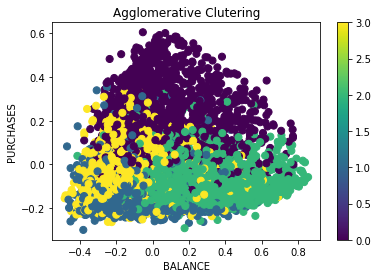

In [11]:
model=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df)
agglomerative=pd.DataFrame(clust_labels)
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df["BALANCE"] ,df["PURCHASES"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)

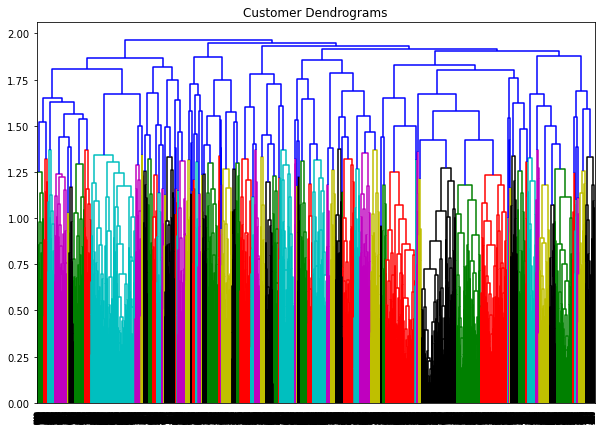

In [5]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(df, method="complete"))


In [12]:
s=[]
from sklearn.cluster import KMeans 
for k in range(1,10):
  km=KMeans(n_clusters=k)
  km=km.fit(df)
  s.append(km.inertia_)
print(s)

[19086.613640404954, 9852.096109259675, 7212.584677896307, 5145.7577184995, 4611.386496365065, 4383.163965647434, 4101.7949984666575, 3903.2560450306783, 3741.591037343539]


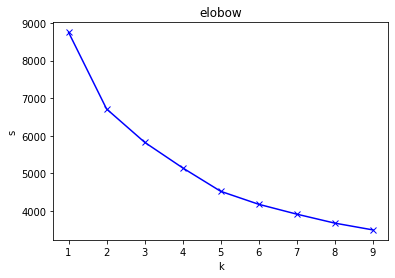

In [7]:
plt.plot(range(1,10),s,"bx-")
plt.xlabel("k")
plt.ylabel("s")
plt.title("elobow")
plt.show()

In [14]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4, random_state=0)
kmeans.fit(df)
kmeans.predict(df)
print(kmeans.cluster_centers_)

[[ 1.09647823e-02  1.01984254e-01  1.67450625e-01  1.67041938e-01
   8.89901176e-02 -8.13029133e-02  2.39623540e-01  3.91698455e-01
   9.40136824e-02 -1.02530095e-01 -8.16267854e-02  2.00039306e-01
   1.17765854e-01  5.73729176e-02 -1.68433937e-02  3.91758254e-02
   6.31073067e-02 -1.70974346e-14]
 [-1.69368272e-01  5.00787787e-02 -5.25619037e-02 -1.04888032e-01
   6.84356910e-02 -1.43074194e-01  3.06140145e-01 -1.72896865e-01
   3.76207877e-01 -1.86444779e-01 -1.41295847e-01  9.39551688e-03
  -1.46137273e-01 -1.11176074e-01 -5.18527974e-02  1.01247848e-01
   2.70941790e-02  3.00000000e+00]
 [ 2.16817010e-01  1.06588575e-01 -9.46809392e-02 -6.88183463e-02
  -9.74668825e-02  2.32246876e-01 -2.02563105e-01 -1.04434651e-01
  -1.75041356e-01  3.37991380e-01  2.42467138e-01 -1.19483695e-01
   7.25821934e-02  3.76640567e-02  4.59114966e-02 -1.22754058e-01
  -1.06446869e-02  1.00000000e+00]
 [-1.36680754e-01 -1.11892581e-01 -1.38033594e-01 -9.25146268e-02
  -1.56323851e-01 -1.15971210e-01 -3.

In [ ]:
labels=pd.DataFrame(kmeans.labels_)
df["label"]=labels
df

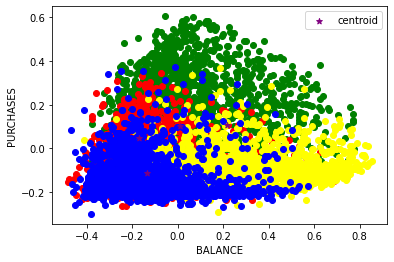

In [26]:
df1=df[df["label"]==0]
df2=df[df["label"]==1]
df3=df[df["label"]==2]
df4=df[df["label"]==3]
plt.scatter(df1["BALANCE"],df1["PURCHASES"],color="green")
plt.scatter(df2["BALANCE"],df2["PURCHASES"],color="red")
plt.scatter(df3["BALANCE"],df3["PURCHASES"],color="yellow")
plt.scatter(df4["BALANCE"],df4["PURCHASES"],color="blue")
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="purple",marker="*",label="centroid")
plt.legend()

In [ ]:
#the two clustering algorithms did well finding the clusters,the results are similar.